In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib agg
from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

import jax
import jax.numpy as jnp
import visualization
from data import standardize
from utils import results, experiments, settings, equioutput, evaluation, graphs

In [2]:
result = results.ResultSample.load_from_file(
    # 1 hl, 3 hn
    "/home/gw/data/experiments/master_thesis/results/1cd0fb4d70b0c0c9bc850afe49a45128.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/cbc8fa72832a535540fd3a72274bd1df.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/f542d3ebd37584291a4d8e9cef5b95f7.tar.gz"
    
    # 1 hl, 4 hn
    #"/home/gw/data/experiments/master_thesis/results/e99343eb8d643d1e9212b2fcab193df5.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/24b3fa55b428355bcb56dab1ae496025.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/c6835cefcab68b58b6f07158f1137c83.tar.gz"
    
    # 2 hl, 3 hn
    #"/home/gw/data/experiments/master_thesis/results/6fad5c77c6e4fcd72601720d57bf25fb.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/89478192c4d7fb7c0c138a6635f0ff04.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/3f20a27ee0828d865a36320f2af66afb.tar.gz"
    
    # 2 hl, 4 hn
    #"/home/gw/data/experiments/master_thesis/results/5fe59dd56f3ecc657fa49ac8b4ec4dce.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/f47e4647c414e39d47e2d5b79a59ce1e.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/ee1191f6065b8f88c88a62cffa269857.tar.gz"
    
    # 2 hl, 8hn
    #"/home/gw/data/experiments/master_thesis/results/37bccc0afc165ff842fbbeab926ab2f3.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/2afe0c254c0afa9dd1ba436f4be5affb.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/52a86ebd73aaa81538d2dccf80bd1b68.tar.gz"
    
    # 4 hl, 4 hn
    #"/home/gw/data/experiments/master_thesis/results/1664a41abb8c2042a3a316cefd1c5e87.tar.gz"
)
experiment = experiments.FactoryExperiment(result.experiment_type, **{"settings": result.settings})()
print(experiment._settings)

SettingsExperimentSample(output_path='/home/ubuntu/data/experiments/master_thesis/results', dataset='sinusoidal', dataset_normalization='standardization', hidden_layers=1, hidden_neurons=3, activation='tanh', activation_last_layer='none', num_warmup=1024, statistic='reduced', statistic_p=0.99, samples_per_chain=1, identifiable_modes=3, pool_size=10, seed=0)


In [3]:
sequential_helper = equioutput.SequentialHelper(
    transformation=experiment._model_transformation,
    dataset=experiment._dataset
)
structured_sequential_samples_parameters = sequential_helper.structured_sequential_samples_parameters(
    samples_parameters=result.samples["parameters"]
)
symmetry_helper = equioutput.SymmetryHelper(structured_sequential_samples_parameters)

In [4]:
print(result.samples["parameters"].shape)
print(sequential_helper._parameters_shapes)

(1274, 10)
FrozenDict({
    params: {
        layers_0: {
            bias: DeviceArray([3], dtype=int32),
            kernel: DeviceArray([1, 3], dtype=int32),
        },
        layers_2: {
            bias: DeviceArray([1], dtype=int32),
            kernel: DeviceArray([3, 1], dtype=int32),
        },
    },
})


# initial status

In [5]:
subspace_0 = symmetry_helper.hidden_layer_subspace(layer=0)
#subspace_1 = symmetry_helper.hidden_layer_subspace(layer=1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.27it/s]


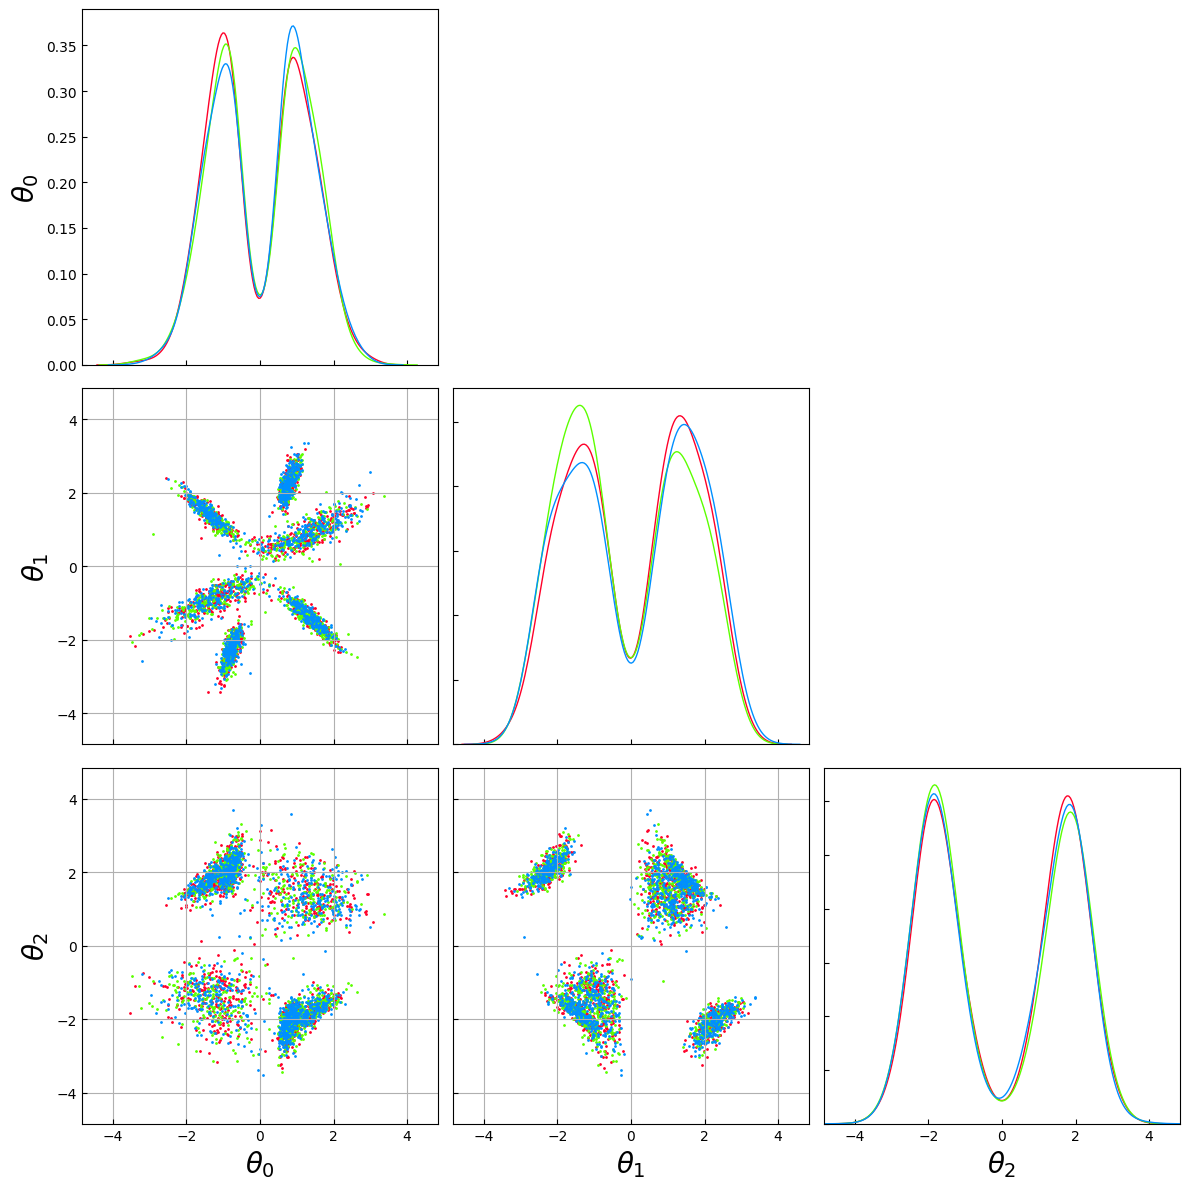

In [6]:
data_list = list(subspace_0.transpose(1, 0, 2))

figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=1.0,
            size=1.0
        ),
        label_size=20
    )
)
figure.plot(
    data_list=data_list
)

In [7]:
symmetry_helper.remove_symmetries(similarity_matrix="rbf", iterations=256, tanh_planes=2, k=1024)

epoch: 0,  loss: 1.5087522268295288, normal l2 norm: 1.2314109802246094
epoch: 1,  loss: 1.4073253870010376, normal l2 norm: 0.9331400990486145
epoch: 2,  loss: 1.3057323694229126, normal l2 norm: 1.0352996587753296
epoch: 3,  loss: 1.2453596591949463, normal l2 norm: 0.9819791316986084
epoch: 4,  loss: 1.2070825099945068, normal l2 norm: 1.1379892826080322
epoch: 5,  loss: 1.1519575119018555, normal l2 norm: 0.9357930421829224
epoch: 6,  loss: 1.1440104246139526, normal l2 norm: 0.9855219721794128
epoch: 7,  loss: 1.1220273971557617, normal l2 norm: 0.8961271643638611
epoch: 8,  loss: 1.1160094738006592, normal l2 norm: 0.9427905678749084
epoch: 9,  loss: 1.1095670461654663, normal l2 norm: 0.8885557651519775
epoch: 10,  loss: 1.1018128395080566, normal l2 norm: 0.92183518409729
epoch: 11,  loss: 1.0909603834152222, normal l2 norm: 0.9316258430480957
epoch: 12,  loss: 1.0938973426818848, normal l2 norm: 0.8984280824661255
epoch: 13,  loss: 1.0912973880767822, normal l2 norm: 0.8935695

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3822/3822 [00:11<00:00, 320.72it/s]


0 2569
1 1491
2 754
3 398
4 188
5 105
6 56
7 33
8 21
9 6
10 2
11 0
12 0
13 0
14 0
15 0
16 0
17 0


In [ ]:
# testing start

In [19]:
subspace_0 = symmetry_helper.hidden_layer_subspace(layer=0)
n, hidden, dim = subspace_0.shape
similarity_matrix = graphs.knn_graph(nodes=subspace_0.reshape((-1, dim)), k=10)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 3822/3822 [00:11<00:00, 331.94it/s]


In [42]:
import numpy as np
print(np.array(similarity_matrix[0].todense()).reshape((-1, )).shape)

(3822,)


In [46]:
knn = equioutput.IterativeGreedyKNN()
knn.run(samples_subspace=subspace_0, labels=np.zeros((n, hidden)), similarity_matrix = similarity_matrix, dense=False)

(array([[0., 1., 2.],
        [0., 1., 2.],
        [0., 1., 2.],
        ...,
        [0., 1., 2.],
        [0., 1., 2.],
        [0., 1., 2.]]),
 array([   0,    1,    2, ..., 1271, 1272, 1273]))

In [ ]:
# testing end

In [12]:
print("before", evaluation.spread(result.samples["parameters"]))
print("after", evaluation.spread(symmetry_helper._structured_sequential_samples_parameters.samples_parameters))

before 2.3616054
after 0.18282765


/home/gw/data/binaries/mt/lib/python3.10/site-packages/jax/_src/numpy/lax_numpy.py:1865: ComplexWarning: Casting complex values to real discards the imaginary part
  out = lax_internal._convert_element_type(out, dtype, weak_type=weak_type)


In [13]:
# TODO: Maybe Spectral Classification greedy variant?
# TODO: Maybe standardize nodes again?

In [14]:
# hidden * hidden was good! but not perfect.
# hidden * hidden again seems to be the choice for now. (4 * hidden was also good.)

# test n * hidden again. -> DOES NOT WORK anymore "too global" i think
# 1 * hidden: not good
# continue run for 4 * hidden -> 256 iterations instead GOOD!

# i wonder whether it is dependent on the problem size or whether there is a constant k value that makes sense. -> experiment.

(3, 1274, 3)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.26it/s]


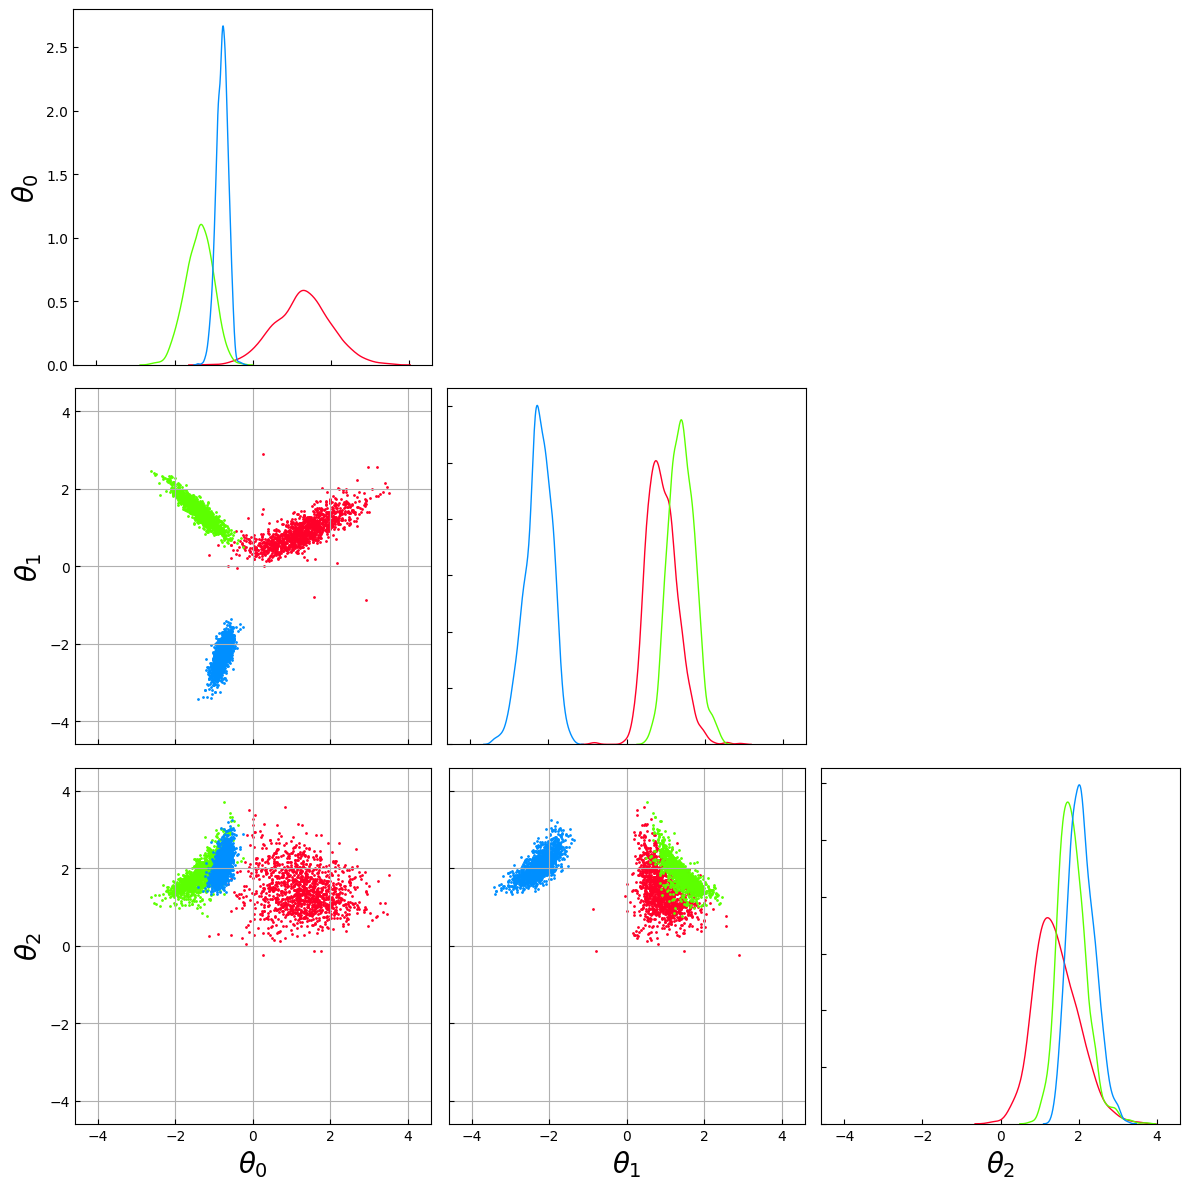

In [15]:
import matplotlib
subspace_0 = symmetry_helper.hidden_layer_subspace(layer=0)
data = subspace_0.transpose(1, 0, 2)
print(data.shape)

figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=1.0,
            size=1.0
        ),
        label_size=20
    )
)
element = 7
figure.plot(
    #data_list=list(data)[element:element+1]
    data_list=list(data)
)

In [12]:
# NOTE: I need to treat the connecting parameters in a special way. Can I optimize them together after having optimized the others beforehand?

In [13]:
import numpy as np

samples_before = standardize(result.samples["parameters"])
samples_after = standardize(symmetry_helper._structured_sequential_samples_parameters.samples_parameters)
#a = graphs.knn_graph(nodes=samples_before, k=10)
a = graphs.knn_graph(nodes=samples_after, k=10) #  HERE
d = graphs.degree_matrix(a)
l = graphs.laplacian(a=a, d=d, normalized=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1274/1274 [00:08<00:00, 145.15it/s]


/tmp/ipykernel_2098877/3139001259.py:6: MatplotlibDeprecationWarning: For X (129) and Y (129) with flat shading, the expected shape of A is (128, 128). Passing A ((1, 16384)) is deprecated since 3.5 and will become an error two minor releases later.
  ax_1.pcolormesh(a[:128, :128].todense(), cmap="gray")
/tmp/ipykernel_2098877/3139001259.py:9: MatplotlibDeprecationWarning: For X (129) and Y (129) with flat shading, the expected shape of A is (128, 128). Passing A ((1, 16384)) is deprecated since 3.5 and will become an error two minor releases later.
  ax_2.pcolormesh(d[:128, :128].todense(), cmap="gray")
/tmp/ipykernel_2098877/3139001259.py:12: MatplotlibDeprecationWarning: For X (129) and Y (129) with flat shading, the expected shape of A is (128, 128). Passing A ((1, 16384)) is deprecated since 3.5 and will become an error two minor releases later.
  ax_3.pcolormesh(l[:128, :128].todense(), cmap="gray")


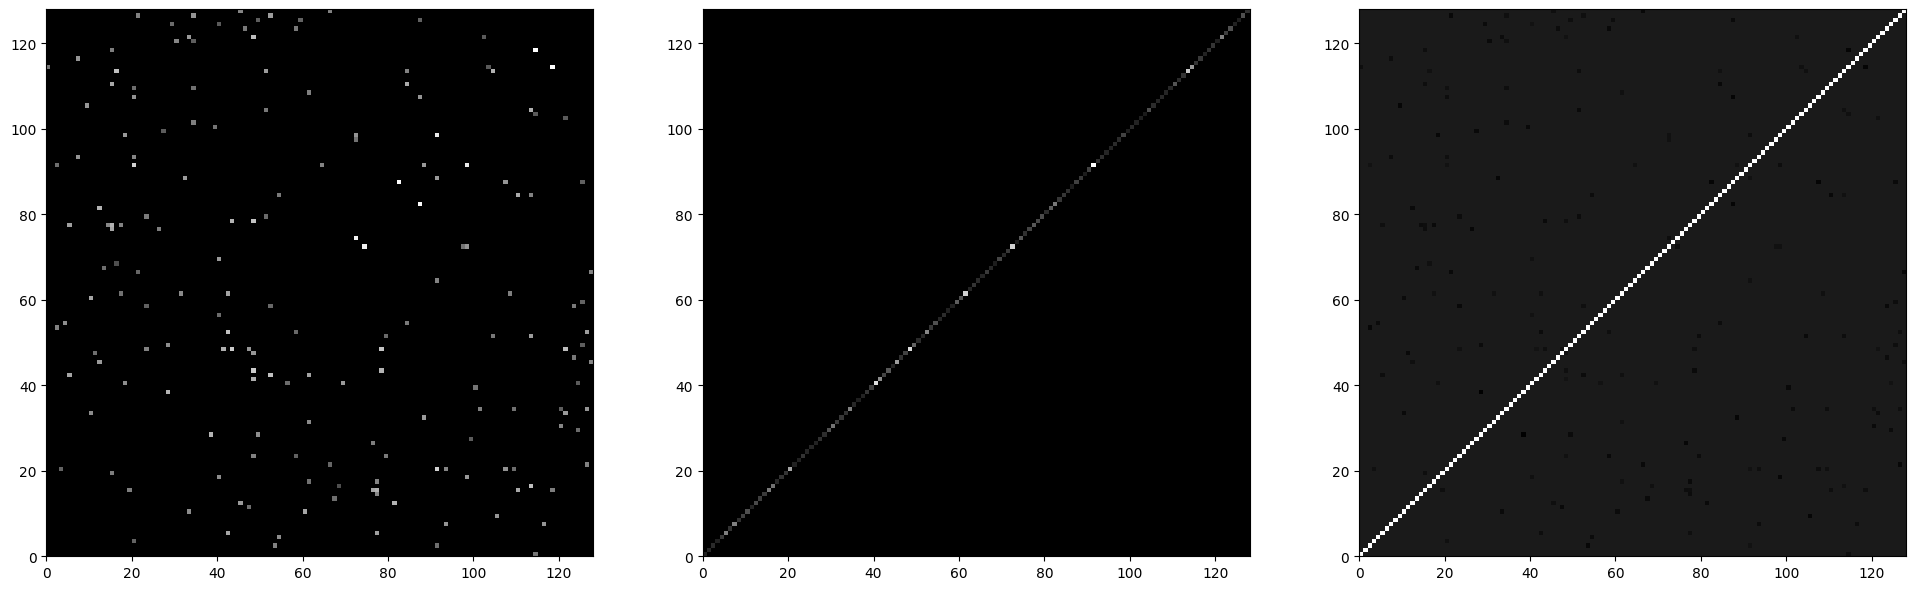

In [14]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(24.0, 8.0))
ax_1 = figure.add_subplot(1, 3, 1)
ax_1.set_aspect("equal")
ax_1.pcolormesh(a[:128, :128].todense(), cmap="gray")
ax_2 = figure.add_subplot(1, 3, 2)
ax_2.set_aspect("equal")
ax_2.pcolormesh(d[:128, :128].todense(), cmap="gray")
ax_3 = figure.add_subplot(1, 3, 3)
ax_3.set_aspect("equal")
ax_3.pcolormesh(l[:128, :128].todense(), cmap="gray")
figure

In [15]:
# spectrum
eigenvalues, eigenvectors = graphs.spectrum(l=l, k=256, normalized=False)

In [16]:
print(eigenvalues.shape, eigenvectors.shape)

(256,) (1274, 256)


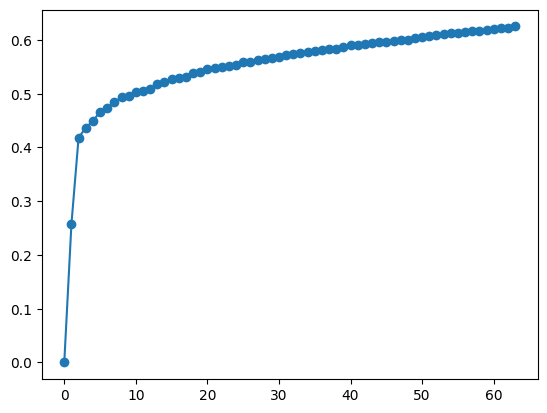

In [17]:
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
amount = 64
ax.scatter(np.arange(len(eigenvalues[:amount])), eigenvalues[:amount])
ax.plot(np.arange(len(eigenvalues[:amount])), eigenvalues[:amount])
figure

In [18]:
k = 1

# permutation symmetry removal

In [19]:
from sklearn.cluster import KMeans

init_means = eigenvectors[:k, :k]
print(init_means.shape)
labels = KMeans(n_clusters=k, init=init_means, max_iter=1000, tol=1e-6).fit(jnp.asarray(eigenvectors[:, :k])).labels_
print(labels)

(1, 1)
[0 0 0 ... 0 0 0]


/home/gw/data/binaries/mt/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


In [ ]:
bla = result.samples["parameters"]

n = 2**10
if len(experiment._dataset.conditional_indices) > 1:
    n = 2**3

subsets = []
for i in range(k):
    selection = jnp.argwhere(labels == i).squeeze()
    subset = bla[np.array(selection)]
    print(subset.shape)
    subsets.append(subset)

bla = symmetry_helper._structured_sequential_samples_parameters.samples_parameters
figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=1.0,
            size=1.0
        ),
        label_size=20
    )
)
figure.plot(
    data_list=subsets
)

(1274, 97)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [11:13<00:00,  6.95s/it]

In [ ]:
bla = symmetry_helper._structured_sequential_samples_parameters.samples_parameters

n = 2**10
if len(experiment._dataset.conditional_indices) > 1:
    n = 2**3

subsets = []
subsets_visualization = []
for i in range(k):
    selection = jnp.argwhere(labels == i).squeeze()
    subset = bla[np.array(selection)]
    print(subset.shape)
    subsets.append(subset)
    subsets_visualization.append(subset[:n])
  
rng_key, rng_key_ = jax.random.split(jax.random.PRNGKey(0))
samples_parameters_fs = jax.random.permutation(rng_key_, bla)
print("samples_parameters_fs.shape", samples_parameters_fs.shape)

figure = visualization.RegressionFigure(
    settings=settings.SettingsRegressionFigure(
        settings_plot=settings.SettingsPlot(
            alpha=0.08,
            epistemic=False
        )
    )
)
figure.plot(
    dataset=experiment._dataset,
    transformation=experiment._model_transformation.apply_from_vector,
    #parameters_list=[samples_parameters_fs[:n]],
    parameters_list=subsets_visualization,
    std=result.samples["std"].mean()
)

In [ ]:
bla = symmetry_helper._structured_sequential_samples_parameters.samples_parameters
figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=0.1,
            size=1.0
        )
    )
)
figure.plot(
    data_list=subsets,
    triangle="upper"
)

In [ ]:
bla = symmetry_helper._structured_sequential_samples_parameters.samples_parameters
figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=1.0,
            size=1.0
        ),
        label_size=20,
        cmap = matplotlib.cm.get_cmap("jet")
    )
)
figure.plot(
    data_list=[bla, bla[:512]]
)